to do:  
- [x] all number plot
- [x] Add readmitted number to the plot
- [x] Add readmitted rotial of each categorical
- [ ] deal with time data - stay time, discharge time, age etc.
- [ ] add stay time plot
- [ ] combine minor categorical data
- [ ] correlation test
- [ ] scatter matrix of possible features

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

# Load Data

In [31]:
df = pd.DataFrame([[np.nan,2,np.nan,0],
                   [3,4,np.nan,1],
                   [np.nan,np.nan,np.nan,5],
                   [np.nan,3,np.nan,4]],
                   columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [34]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [2]:
path = '../mimic-iii-clinical-database-1.4/'
gz_files = [x for x in os.listdir(path) if x.endswith(".gz")]
csv_files = [x for x in os.listdir(path) if x.endswith(".csv")]
print(gz_files)
print(csv_files)

['CAREGIVERS.csv.gz', 'ADMISSIONS.csv.gz', 'CALLOUT.csv.gz', 'CHARTEVENTS.csv.gz']
['PATIENTS.csv', 'ICUSTAYS.csv']


In [3]:
def load_data(name, gz=False):
    if gz:
        df = pd.read_csv(path + name, compression='gzip', header=0, sep=',', quotechar='"')
    else:
        df = pd.read_csv(path + name, header=0, sep=',', quotechar='"')
    print(df.info())
    return df

In [4]:
df_ad = load_data(gz_files[1], gz=True)
df_ad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
ROW_ID                  58976 non-null int64
SUBJECT_ID              58976 non-null int64
HADM_ID                 58976 non-null int64
ADMITTIME               58976 non-null object
DISCHTIME               58976 non-null object
DEATHTIME               5854 non-null object
ADMISSION_TYPE          58976 non-null object
ADMISSION_LOCATION      58976 non-null object
DISCHARGE_LOCATION      58976 non-null object
INSURANCE               58976 non-null object
LANGUAGE                33644 non-null object
RELIGION                58518 non-null object
MARITAL_STATUS          48848 non-null object
ETHNICITY               58976 non-null object
EDREGTIME               30877 non-null object
EDOUTTIME               30877 non-null object
DIAGNOSIS               58951 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null int64
HAS_CHARTEVENTS_DATA    58976 non-null int64
dtypes: int64(5), objec

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [5]:
df_caregives = load_data(gz_files[0], gz=True)
df_caregives.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7567 entries, 0 to 7566
Data columns (total 4 columns):
ROW_ID         7567 non-null int64
CGID           7567 non-null int64
LABEL          7518 non-null object
DESCRIPTION    5155 non-null object
dtypes: int64(2), object(2)
memory usage: 236.5+ KB
None


,ROW_ID,CGID,LABEL,DESCRIPTION
0,2228,16174,RO,Read Only
1,2229,16175,RO,Read Only
2,2230,16176,Res,Resident/Fellow/PA/NP
3,2231,16177,RO,Read Only
4,2232,16178,RT,Respiratory


In [6]:
df_callout = load_data(gz_files[2], gz=True)
df_callout.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34499 entries, 0 to 34498
Data columns (total 24 columns):
ROW_ID                    34499 non-null int64
SUBJECT_ID                34499 non-null int64
HADM_ID                   34499 non-null int64
SUBMIT_WARDID             34498 non-null float64
SUBMIT_CAREUNIT           5122 non-null object
CURR_WARDID               34498 non-null float64
CURR_CAREUNIT             34498 non-null object
CALLOUT_WARDID            34499 non-null int64
CALLOUT_SERVICE           34499 non-null object
REQUEST_TELE              34499 non-null int64
REQUEST_RESP              34499 non-null int64
REQUEST_CDIFF             34499 non-null int64
REQUEST_MRSA              34499 non-null int64
REQUEST_VRE               34499 non-null int64
CALLOUT_STATUS            34499 non-null object
CALLOUT_OUTCOME           34499 non-null object
DISCHARGE_WARDID          29967 non-null float64
ACKNOWLEDGE_STATUS        34499 non-null object
CREATETIME                34499 no

,ROW_ID,SUBJECT_ID,HADM_ID,SUBMIT_WARDID,SUBMIT_CAREUNIT,CURR_WARDID,CURR_CAREUNIT,CALLOUT_WARDID,CALLOUT_SERVICE,REQUEST_TELE,...,CALLOUT_STATUS,CALLOUT_OUTCOME,DISCHARGE_WARDID,ACKNOWLEDGE_STATUS,CREATETIME,UPDATETIME,ACKNOWLEDGETIME,OUTCOMETIME,FIRSTRESERVATIONTIME,CURRENTRESERVATIONTIME
0,402,854,175684,52.0,NaN,29.0,MICU,1,MED,0,...,Inactive,Discharged,29.0,Acknowledged,2146-10-05 13:16:55,2146-10-05 13:16:55,2146-10-05 13:24:00,2146-10-05 18:55:22,2146-10-05 15:27:44,NaN
1,403,864,138624,15.0,NaN,55.0,CSRU,55,CSURG,0,...,Inactive,Discharged,55.0,Acknowledged,2114-11-28 08:31:39,2114-11-28 09:42:08,2114-11-28 09:43:08,2114-11-28 12:10:02,NaN,NaN
2,404,864,138624,12.0,NaN,55.0,CSRU,55,CSURG,1,...,Inactive,Discharged,55.0,Acknowledged,2114-11-30 10:24:25,2114-12-01 09:06:18,2114-12-01 12:26:05,2114-12-01 21:55:05,NaN,NaN
3,405,867,184298,7.0,NaN,17.0,CCU,17,CCU,1,...,Inactive,Discharged,17.0,Acknowledged,2136-12-29 08:45:42,2136-12-29 10:17:16,2136-12-29 10:33:51,2136-12-29 18:10:02,NaN,NaN
4,157,306,167129,57.0,NaN,3.0,SICU,44,NSURG,1,...,Inactive,Discharged,3.0,Acknowledged,2199-09-18 11:47:47,2199-09-18 11:47:47,2199-09-18 11:58:33,2199-09-18 15:10:02,NaN,NaN


In [7]:
csv_files

['PATIENTS.csv', 'ICUSTAYS.csv']

In [8]:
df_patients = load_data(csv_files[0])
df_patients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
ROW_ID         46520 non-null int64
SUBJECT_ID     46520 non-null int64
GENDER         46520 non-null object
DOB            46520 non-null object
DOD            15759 non-null object
DOD_HOSP       9974 non-null object
DOD_SSN        13378 non-null object
EXPIRE_FLAG    46520 non-null int64
dtypes: int64(3), object(5)
memory usage: 2.8+ MB
None


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [9]:
df_icustays = load_data(csv_files[1])
df_icustays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
ROW_ID            61532 non-null int64
SUBJECT_ID        61532 non-null int64
HADM_ID           61532 non-null int64
ICUSTAY_ID        61532 non-null int64
DBSOURCE          61532 non-null object
FIRST_CAREUNIT    61532 non-null object
LAST_CAREUNIT     61532 non-null object
FIRST_WARDID      61532 non-null int64
LAST_WARDID       61532 non-null int64
INTIME            61532 non-null object
OUTTIME           61522 non-null object
LOS               61522 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB
None


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


# admission and patient EDA

In [10]:
 df_ad.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


Let's see how many records and how many unique patients

In [11]:
print("there are " + str(len(df_ad.HADM_ID.unique())) + " unique records")
print("there are " + str(len(df_ad.SUBJECT_ID.unique())) + " unique patients")

there are 58976 unique records
there are 46520 unique patients


Then let's see how many patients have readmission and how many times are they

In [12]:
df_ad_admittedTime = df_ad[['HADM_ID', 'SUBJECT_ID']].groupby(["SUBJECT_ID"]).count()
df_read = df_ad_admittedTime[df_ad_admittedTime['HADM_ID'] > 1]
df_read.head()

,HADM_ID
SUBJECT_ID,
17,2
21,2
23,2
34,2
36,3


In [24]:
df_read

,HADM_ID
SUBJECT_ID,
17,2
21,2
23,2
34,2
36,3
61,2
67,2
68,2
84,2


In [13]:
print(str(len(df_read)) + " patients have readmitted record")
print("That's " + str(len(df_read)/len(df_ad.SUBJECT_ID.unique()) * 100) + "% of patients")
df_read.describe()

7537 patients have readmitted record
That's 16.201633705932935% of patients


,HADM_ID
count,7537.000000
mean,2.652647
std,1.621112
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,42.000000


From here we can know that some people have more than one readmission

In [14]:
df_ad_admittedTime['HADM_ID'].value_counts()

1     38983
2      5160
3      1342
4       508
5       246
6       113
7        51
8        31
9        26
10       14
11       13
12        8
13        5
14        4
17        3
16        2
34        2
24        1
42        1
15        1
19        1
20        1
21        1
22        1
23        1
31        1
Name: HADM_ID, dtype: int64

Let's check other categorical data.  
Since we want to see the comperation of the readmitted patient and non-readmitted patient. We need to displate our dataframe first.

In [15]:
df_read.index

Int64Index([   17,    21,    23,    34,    36,    61,    67,    68,    84,
               85,
            ...
            99660, 99712, 99756, 99781, 99783, 99822, 99883, 99897, 99923,
            99982],
           dtype='int64', name='SUBJECT_ID', length=7537)

In [16]:
df_nonad = df_ad[~df_ad["SUBJECT_ID"].isin(df_read.index)]
df_rad = df_ad[df_ad["SUBJECT_ID"].isin(df_read.index)]

Here, although patients in df_rad have duplicates, however, every record is in different situation. So, we will not drop duplicates or make other chage of the dataframe

In [17]:
df_nonad['SUBJECT_ID'].value_counts()

2047     1
24001    1
5576     1
28103    1
26054    1
32197    1
30148    1
19907    1
83394    1
42430    1
42590    1
52659    1
78152    1
11695    1
9646     1
15789    1
3499     1
1450     1
7625     1
97907    1
97660    1
13772    1
32229    1
30180    1
19939    1
24033    1
21984    1
44511    1
70838    1
99802    1
        ..
12947    1
14994    1
8849     1
10896    1
65878    1
67657    1
57993    1
47746    1
69141    1
21119    1
31386    1
19100    1
29371    1
17053    1
31418    1
25273    1
27320    1
67199    1
693      1
72103    1
12979    1
15026    1
8881     1
85197    1
93357    1
94767    1
60072    1
71293    1
23198    1
4098     1
Name: SUBJECT_ID, Length: 38983, dtype: int64

In [18]:
def plot_ca(name):
    fig,ax1 = plt.subplots(figsize=(12,5),dpi=80)
    nonad = df_nonad[name].value_counts()
    ad = df_rad[name].value_counts()
    name_list = list(nonad.index)
    X = range(len(nonad))
    plt.bar(X, nonad, alpha=0.9, width = 0.55, facecolor = 'lightskyblue', 
            edgecolor = 'white', lw=1, tick_label=name_list, label='non-readmitted')
    plt.bar(X, ad, bottom=nonad, alpha=0.9, width = 0.55, color = 'r', 
            edgecolor = 'white', lw=1, label='readmitted')
    plt.xticks(rotation=70, fontsize=16)

    # ax.set_xlabel(name, color='k', fontsize=14)
    ax1.set_title(name, fontsize=14)
    plt.legend()

    # add number
#     for x,y in enumerate(list(nonad)):
#         ax.text(x - 0.15, y + 500,y,va='center',fontsize=14)

    y = [list(ad)[i]/list(nonad)[i] for i in X]
    axes2 = ax1.twinx()
    axes2.plot(X, y, color='k', marker='d', label='non-readmitted / readmitted')
    axes2.set_ylim(0, 1)
    axes2.set_ylabel('Line Plot')
    for i,v in enumerate(y):
        axes2.text(i - 0.15, v + 0.05,round(v,2),va='center',fontsize=14)
    
    plt.legend()
    plt.show()

In [19]:
df_ad.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [20]:
ca_list = ['ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY']
for i in ca_list:
    print(str(i) + "  " + str(len(df_ad[i].unique())))

ADMISSION_TYPE  4
ADMISSION_LOCATION  9
DISCHARGE_LOCATION  17
INSURANCE  5
LANGUAGE  76
RELIGION  21
MARITAL_STATUS  8
ETHNICITY  41


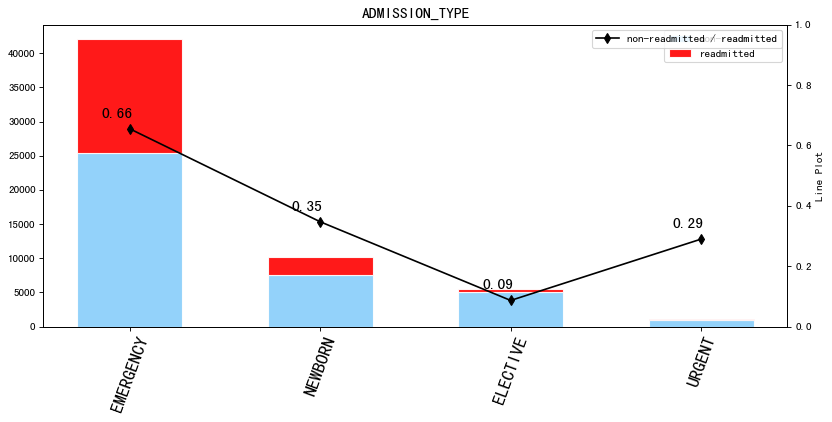

In [21]:
plot_ca('ADMISSION_TYPE')

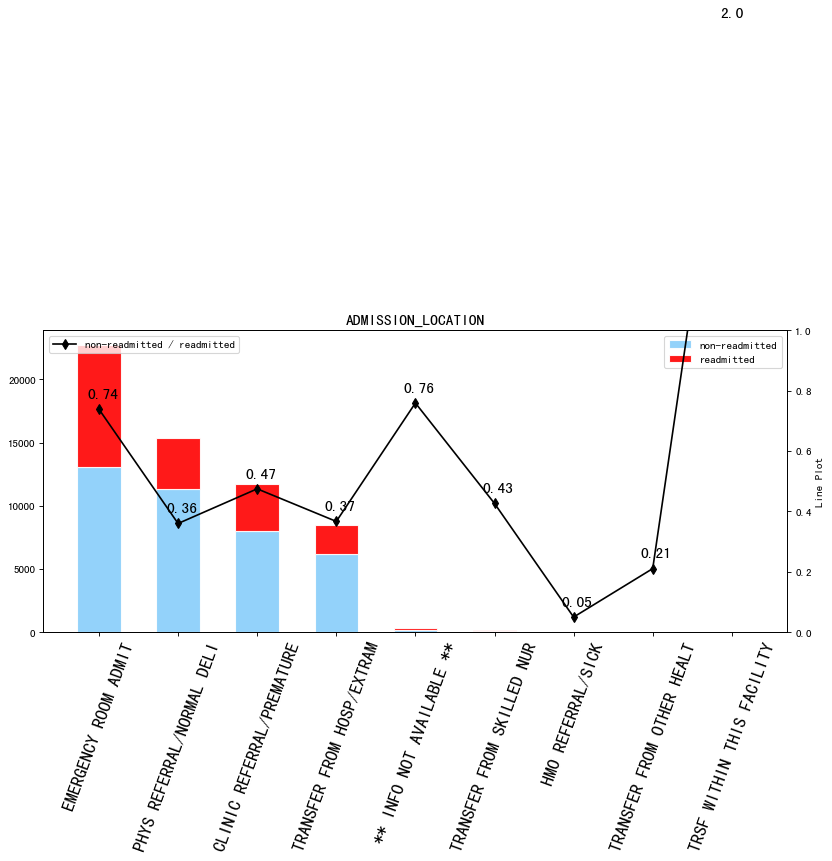

In [22]:
plot_ca('ADMISSION_LOCATION')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

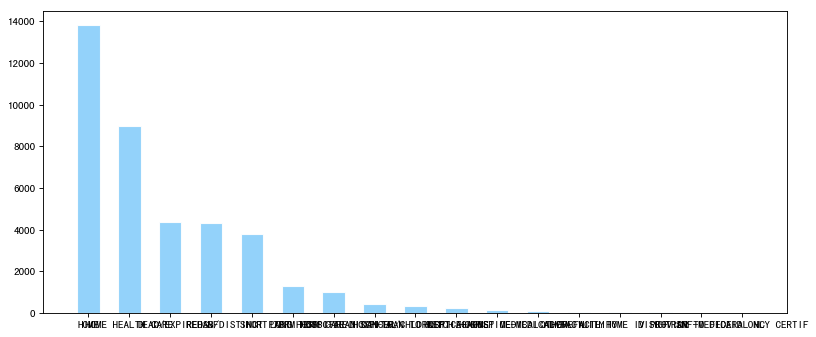

In [23]:
plot_ca('DISCHARGE_LOCATION')

In [ ]:
plot_ca('INSURANCE')

In [ ]:
plot_ca('RELIGION')

In [ ]:
plot_ca('MARITAL_STATUS')

Then let's see what happened with language and ethnicity:  
Although they are not readable, we can still see that English and white is the majority of the database.

In [ ]:
plot_ca('LANGUAGE')

In [ ]:
plot_ca('ETHNICITY')

In [ ]:
np.sum(df.isnull())